In [7]:
import csv
import pandas as pd 
import numpy as np

ModuleNotFoundError: No module named 'dataset_agg'

In [8]:

import json 
import random
import time
import uuid 
import csv
import pandas as pd 
import numpy as np


def select_and_combine():
    
    austin = pd.read_csv('crime-reports-1.csv')
    austin = austin[:15000]
    austin = austin[['Highest Offense Description', 'Occurred Date', 'Report Date', 'Address']]
    austin.rename(columns = {'Highest Offense Description':'CrimeType', 'Occurred Date':'Time', 'Address':'Location', 'Report Date':'InsertionTime'}, inplace = True)
    austin['City'] = 'AUS'
    austin['Weapon'] = np.nan
    austin['Precinct'] = np.nan
    austin['SuspectDescription'] = np.nan
    austin['VictimDescription'] = np.nan
    
        
    atlanta = pd.read_csv('atlcrime.csv')
    atlanta = atlanta[:15000]
    atlanta = atlanta[['crime', 'date', 'location']]
    atlanta.rename(columns = {'crime':'CrimeType', 'date':'Time', 'location':'Location'}, inplace = True)
    atlanta['City'] = 'ATL'
    atlanta['Weapon'] = np.nan
    atlanta['InsertionTime'] = np.nan
    atlanta['Precinct'] = np.nan
    atlanta['SuspectDescription'] = np.nan
    atlanta['VictimDescription'] = np.nan
    
    boston = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
    boston = boston[:15000]
    boston = boston[['CrimeDate', 'District', 'Description', 'Weapon']]
    boston.rename(columns = {'CrimeDate':'Time', 'Description':'CrimeType', 'District':'Location', 'Weapon':'Weapon'}, inplace = True)
    boston['City'] = 'BOS'
    boston['InsertionTime'] = np.nan
    boston['Precinct'] = np.nan
    boston['SuspectDescription'] = np.nan
    boston['VictimDescription'] = np.nan
    
    nypd = pd.read_csv('nypd-arrest-data-year-to-date-1.csv')
    nypd = nypd[:15000]
    nypd = nypd[['OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']]
    nypd['Location'] = nypd['Latitude'].astype(str) + nypd['Longitude'].astype(str)
    nypd['SuspectDescription'] = nypd['PERP_SEX'].astype(str) + nypd['PERP_RACE'].astype(str) + nypd['AGE_GROUP'].astype(str)
    nypd = nypd[['OFNS_DESC', 'SuspectDescription', 'Location']]
    nypd.rename(columns = {'OFNS_DESC':'CrimeType', 'SuspectDescription':'SuspectDescription', 'Location':'Location'}, inplace = True)
    nypd['City'] = 'NYC'
    nypd['InsertionTime'] = np.nan
    nypd['Precinct'] = np.nan
    nypd['Weapon'] = np.nan
    nypd['VictimDescription'] = np.nan
    nypd['Time'] = np.nan
    
    
    nyc = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
    nyc = nyc[:15000]
    nyc = nyc[['RPT_DT', 'OFNS_DESC', 'BORO_NM', 'SUSP_AGE_GROUP', 'SUSP_RACE', 
               'SUSP_SEX', 'STATION_NAME', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']]
    nyc['VictimDescription'] = nyc['VIC_AGE_GROUP'].astype(str) + nyc['VIC_RACE'].astype(str) + nyc['VIC_SEX'].astype(str)
    nyc['SuspectDescription'] = nyc['SUSP_AGE_GROUP'].astype(str) + nyc['SUSP_RACE'].astype(str) + nyc['SUSP_SEX'].astype(str)
    nyc = nyc[['RPT_DT', 'OFNS_DESC', 'BORO_NM', 'SuspectDescription', 'STATION_NAME', 'VictimDescription']]
    nyc.rename(columns = {'RPT_DT':'Time', 'OFNS_DESC':'CrimeType', 'SuspectDescription':'SuspectDescription', 'BORO_NM':'Location', 
                           'VictimDescription':'VictimDescription', 'STATION_NAME':'Precinct'}, inplace = True)
    nyc['InsertionTime'] = np.nan
    nyc['Weapon'] = np.nan
    nyc['City'] = 'NYC'
    
    
    
    
    
    #combined = nyc.join(nypd.join(boston.join(austin.join(atlanta))))
    combined = pd.concat([austin, atlanta, boston, nypd, nyc])
    return combined

combined = select_and_combine()
combined
 

C:\Users\yajue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\yajue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\yajue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,City,CrimeType,InsertionTime,Location,Precinct,SuspectDescription,Time,VictimDescription,Weapon
0,AUS,INVASIVE VISUAL RECORDING,03/20/2007,1700 BLOCK W CESAR CHAVEZ ST,NaN,NaN,03/20/2007,NaN,NaN
1,AUS,INDECENCY WITH A CHILD/CONTACT,05/21/2018,10700 BLOCK S 1ST ST,NaN,NaN,05/18/2018,NaN,NaN
2,AUS,DATING DISTURBANCE,10/27/2018,2201 MONTOPLOIS DR,NaN,NaN,10/27/2018,NaN,NaN
3,AUS,FAMILY DISTURBANCE,05/18/2014,12836 BUENOS ARIES PKWY,NaN,NaN,05/18/2014,NaN,NaN
4,AUS,CRASH/FAIL STOP AND RENDER AID,04/09/2008,2500 BLOCK OF GUADALUPE,NaN,NaN,04/09/2008,NaN,NaN
5,AUS,INDECENT EXPOSURE,02/21/2003,8800 BLOCK N I 35 SB SVC RD,NaN,NaN,02/21/2003,NaN,NaN
6,AUS,DWI,07/16/2016,6000 BLK OF BOLM RD,NaN,NaN,07/15/2016,NaN,NaN
7,AUS,PROTECTIVE ORDER,06/28/2013,COHISE COUNTY AZ,NaN,NaN,06/28/2013,NaN,NaN
8,AUS,POSS OF DRUG PARAPHERNALIA,08/09/2008,2600 HWY,NaN,NaN,08/09/2008,NaN,NaN
9,AUS,VIOL STATE LAW - OTHER,01/07/2008,3404 S FM973,NaN,NaN,01/06/2008,NaN,NaN


In [11]:
import matplotlib.pyplot as plt

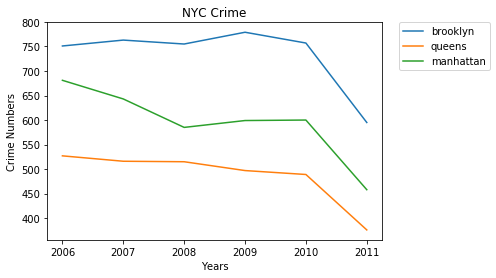

In [41]:
#crime in brooklyn in nyc, over years 
stripped = combined[['Location', 'Time']]
brooklyn = stripped.loc[stripped['Location'] == 'BROOKLYN']
#brooklyn
queens = stripped.loc[stripped['Location'] == 'QUEENS']
man = stripped.loc[stripped['Location'] == 'MANHATTAN']
def gen_values(curr_df):
    count_dict = {}

    count_dict['2006'] = 0
    count_dict['2007'] = 0
    count_dict['2008'] = 0
    count_dict['2009'] = 0
    count_dict['2010'] = 0
    count_dict['2011'] = 0

    for index, row in curr_df.iterrows():
        if row['Time'][-4:] == '2006': 
            count_dict['2006'] += 1 
        if row['Time'][-4:] == '2007': 
            count_dict['2007'] += 1 
        if row['Time'][-4:] == '2008': 
            count_dict['2008'] += 1 
        if row['Time'][-4:] == '2009': 
            count_dict['2009'] += 1 
        if row['Time'][-4:] == '2010': 
            count_dict['2010'] += 1 
        if row['Time'][-4:] == '2011': 
            count_dict['2011'] += 1 
    return count_dict 
count_dict_brooklyn = gen_values(brooklyn)
count_dict_queens = gen_values(queens)
count_dict_man = gen_values(man)
plt.plot([2006, 2007, 2008, 2009, 2010, 2011], count_dict_brooklyn.values(), label="brooklyn")
plt.plot([2006, 2007, 2008, 2009, 2010, 2011], count_dict_queens.values(), label="queens")
plt.plot([2006, 2007, 2008, 2009, 2010, 2011], count_dict_man.values(), label="manhattan")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Years")
plt.ylabel("Crime Numbers")
plt.title("NYC Crime")
#plt.plot([2006, 2007, 2008, 2009, 2010, 2011], count_dict_man.values())
plt.show()    



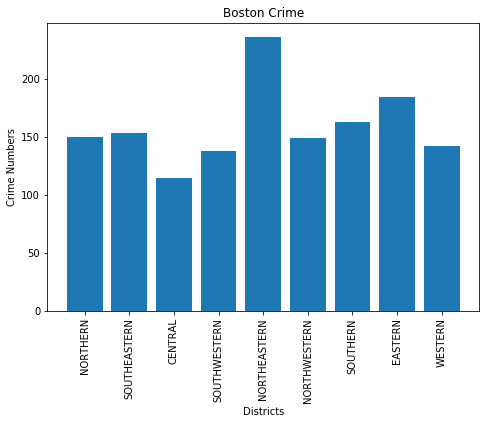

In [62]:
#selet count(*) from crimes where city = boston and weapon = 'fiirearm' group by precinct;
from collections import Counter
selected = combined[['City', 'Location', 'Weapon']]
boston = selected.loc[(selected['City'] == 'BOS') & (selected['Weapon'] == 'FIREARM')]
boston = boston[['Location']]
loc_list = []
for index, row in boston.iterrows():
    to_add = row['Location']
    loc_list.append(to_add)

districts = list(Counter(loc_list).keys())[:-1] # equals to list(set(words))
freq = list(Counter(loc_list).values())[:-1] # counts the elements' frequency  
#print(freq)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(districts, freq)
plt.xticks(districts, districts, rotation='vertical')
plt.xlabel("Districts")
plt.ylabel("Crime Numbers")
plt.title("Boston Crime")
plt.show()